In [28]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [29]:
df = pd.read_csv("images_dataset_base.csv")
df.head()

,filename,path,width,height,mode,filesize_bytes,aspect_ratio,area_px
0,1era.png,C:\Users\Sebastian\Desktop\Gear5_part\Images_D...,360,480,RGBA,300076,0.750,172800
1,2do.png,C:\Users\Sebastian\Desktop\Gear5_part\Images_D...,359,503,RGBA,292652,0.714,180577
2,3era.png,C:\Users\Sebastian\Desktop\Gear5_part\Images_D...,349,451,RGBA,228079,0.774,157399
3,4ta.png,C:\Users\Sebastian\Desktop\Gear5_part\Images_D...,345,480,RGBA,238942,0.719,165600
4,Captura de pantalla 2025-10-08 161528.png,C:\Users\Sebastian\Desktop\Gear5_part\Images_D...,355,498,RGBA,300787,0.713,176790


In [30]:
# Selección de muestra
sample_images = df.sample(10, random_state=42)["path"].tolist()

print(f"Se han seleccionado {len(sample_images)} imágenes de muestra.")
for i, img_path in enumerate(sample_images):
    print(f"{i+1}. {img_path}")

Se han seleccionado 10 imágenes de muestra.
1. C:\Users\Sebastian\Desktop\Gear5_part\Images_Dataset\Captura de pantalla 2025-10-08 175426.png
2. C:\Users\Sebastian\Desktop\Gear5_part\Images_Dataset\Captura de pantalla 2025-10-08 165411.png
3. C:\Users\Sebastian\Desktop\Gear5_part\Images_Dataset\Screenshot 2025-10-10 041035.png
4. C:\Users\Sebastian\Desktop\Gear5_part\Images_Dataset\IMG_2542(3).jpeg
5. C:\Users\Sebastian\Desktop\Gear5_part\Images_Dataset\Screenshot 2025-10-09 014142.png
6. C:\Users\Sebastian\Desktop\Gear5_part\Images_Dataset\IMG-20250916-WA0032_15.jpg
7. C:\Users\Sebastian\Desktop\Gear5_part\Images_Dataset\IMG_2539(2).jpeg
8. C:\Users\Sebastian\Desktop\Gear5_part\Images_Dataset\Captura de pantalla 2025-10-08 180406.png
9. C:\Users\Sebastian\Desktop\Gear5_part\Images_Dataset\Captura de pantalla 2025-10-08 170650.png
10. C:\Users\Sebastian\Desktop\Gear5_part\Images_Dataset\Captura de pantalla 2025-10-08 181136.png


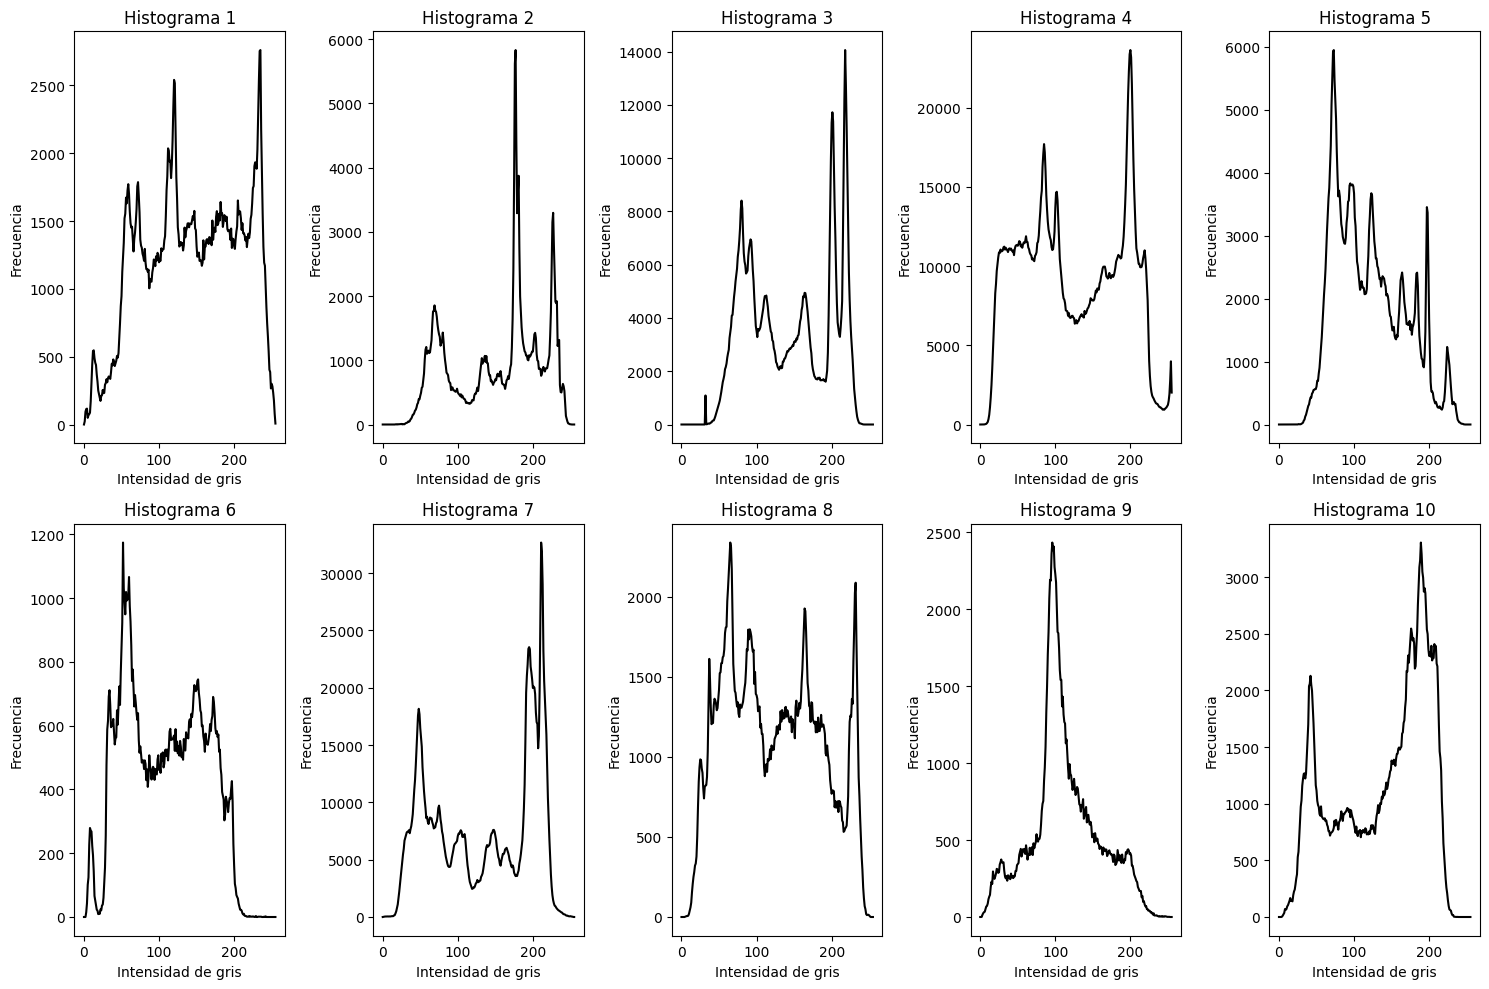

In [31]:
#Visualización de histogramas
from matplotlib import pyplot as plt
import cv2

plt.figure(figsize=(15, 10))

for i, img_path in enumerate(sample_images):
    img = cv2.imread(img_path)
    if img is None:
        print(f"No se pudo leer: {img_path}")
        continue

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    hist = cv2.calcHist([gray], [0], None, [256], [0, 256])

    plt.subplot(2, 5, i+1)
    plt.plot(hist, color='black')
    plt.title(f"Histograma {i+1}")
    plt.xlabel("Intensidad de gris")
    plt.ylabel("Frecuencia")
    plt.tight_layout()

plt.show()

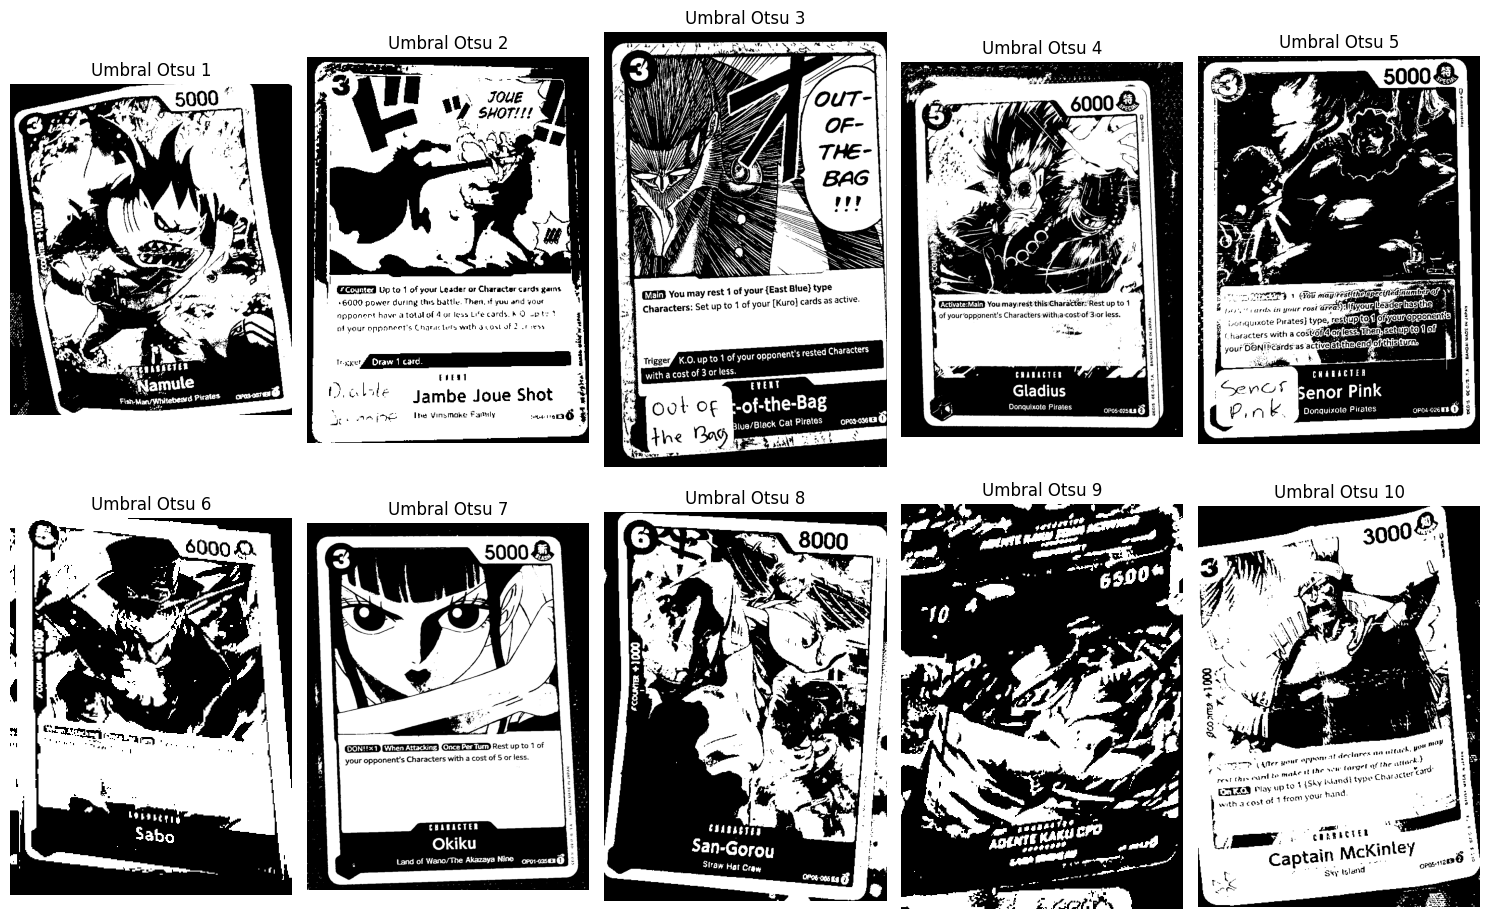

In [32]:
#umbralización de Otsu
plt.figure(figsize=(15, 10))

for i, img_path in enumerate(sample_images):
    img = cv2.imread(img_path)
    if img is None:
        print(f"No se pudo leer: {img_path}")
        continue

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Aplicar método de Otsu
    _, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    plt.subplot(2, 5, i+1)
    plt.imshow(thresh, cmap="gray")
    plt.title(f"Umbral Otsu {i+1}")
    plt.axis("off")
    plt.tight_layout()

plt.show()

In [33]:
#Evaluar calidad de la umbralización
import numpy as np
import os
import cv2

resultados = []

for i, img_path in enumerate(sample_images):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    total = gray.size
    blancos = np.sum(thresh == 255)
    negros = np.sum(thresh == 0)

    ratio_blanco = blancos / total * 100
    ratio_negro = negros / total * 100

    resultados.append({
        "imagen": os.path.basename(img_path),
        "blanco_%": round(ratio_blanco, 2),
        "negro_%": round(ratio_negro, 2)
    })

df_resultados = pd.DataFrame(resultados)
display(df_resultados)

,imagen,blanco_%,negro_%
0,Captura de pantalla 2025-10-08 175426.png,49.46,50.54
1,Captura de pantalla 2025-10-08 165411.png,63.29,36.71
2,Screenshot 2025-10-10 041035.png,50.08,49.92
3,IMG_2542(3).jpeg,46.84,53.16
4,Screenshot 2025-10-09 014142.png,37.32,62.68
5,IMG-20250916-WA0032_15.jpg,49.87,50.13
6,IMG_2539(2).jpeg,55.77,44.23
7,Captura de pantalla 2025-10-08 180406.png,47.54,52.46
8,Captura de pantalla 2025-10-08 170650.png,32.43,67.57
9,Captura de pantalla 2025-10-08 181136.png,64.19,35.81


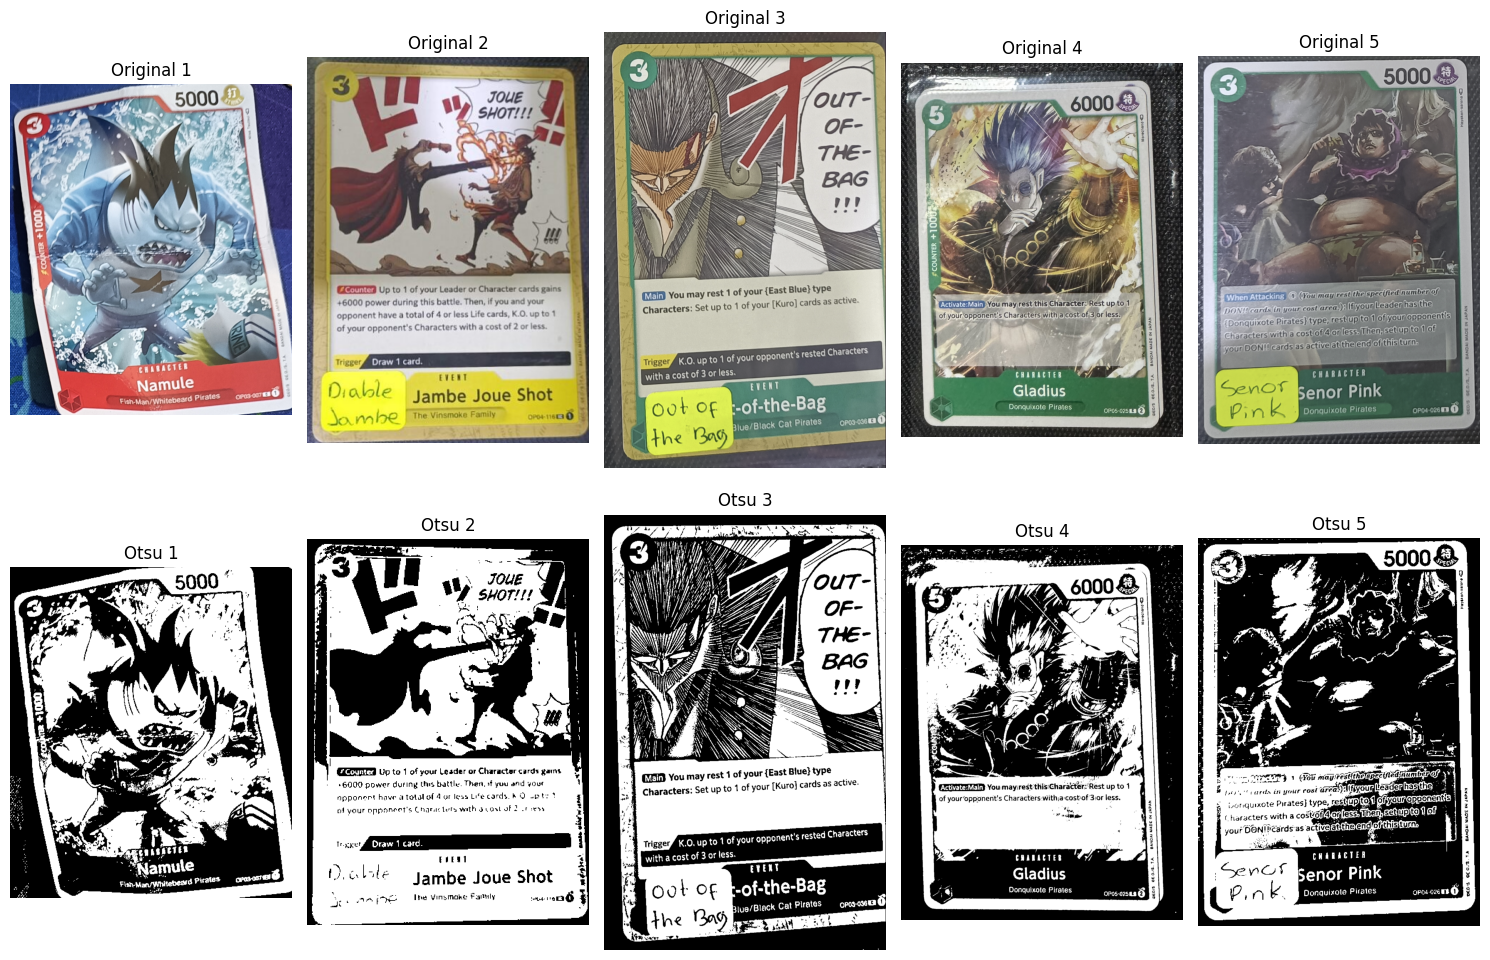

In [34]:
# Comparación visual de antes y después 
plt.figure(figsize=(15, 10))

for i, img_path in enumerate(sample_images[:5]):  #5 imgs
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _, otsu = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Original
    plt.subplot(2, 5, i+1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(f"Original {i+1}")
    plt.axis("off")

    # Umbralizada
    plt.subplot(2, 5, i+6)
    plt.imshow(otsu, cmap="gray")
    plt.title(f"Otsu {i+1}")
    plt.axis("off")

plt.tight_layout()
plt.show()

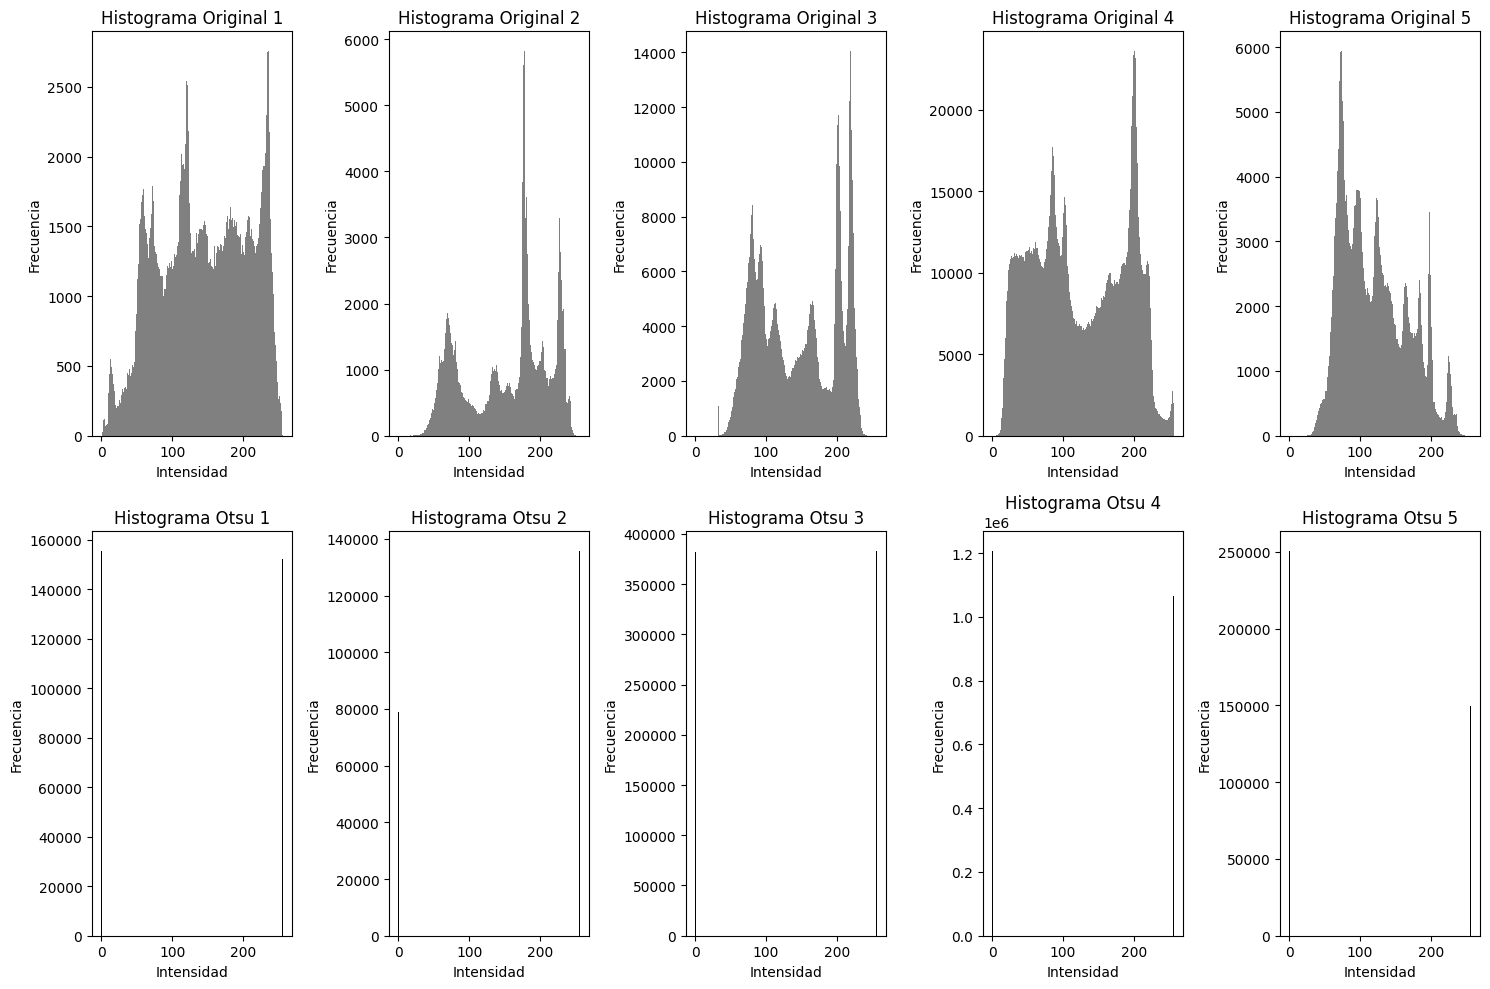

In [ ]:
#Comparación de Histogramas, antes y después de Umbralización

import matplotlib.pyplot as plt
import cv2

plt.figure(figsize=(15, 10))

for i, img_path in enumerate(sample_images[:5]):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    plt.subplot(2, 5, i+1)
    plt.hist(gray.ravel(), bins=256, range=[0, 256], color='gray')
    plt.title(f"Histograma Original {i+1}")
    plt.xlabel("Intensidad")
    plt.ylabel("Frecuencia")

    _, otsu = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    plt.subplot(2, 5, i+6)
    plt.hist(otsu.ravel(), bins=256, range=[0, 256], color='black')
    plt.title(f"Histograma Otsu {i+1}")
    plt.xlabel("Intensidad")
    plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()

In [25]:
#Resultados de las 10 imágenes elegidas
promedio_blanco = df_resultados["blanco_%"].mean()
promedio_negro = df_resultados["negro_%"].mean()

print("ANÁLISIS EDA DE LA UMBRALIZACIÓN.-")
print(f"Promedio de píxeles blancos: {promedio_blanco:.2f}%")
print(f"Promedio de píxeles negros: {promedio_negro:.2f}%")

ANÁLISIS EDA DE LA UMBRALIZACIÓN.-
Promedio de píxeles blancos: 49.68%
Promedio de píxeles negros: 50.32%


In [23]:
# Promedio global de píxeles blancos y negros de todas las imágenes del dataset 
import numpy as np
import cv2
import pandas as pd
import os

df = pd.read_csv("images_dataset_base.csv")
all_images = df["path"].tolist()

resultados_globales = []

for img_path in all_images:
    img = cv2.imread(img_path)
    if img is None:
        print(f"No se pudo leer: {img_path}")
        continue

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    total = gray.size
    blancos = np.sum(thresh == 255)
    negros = np.sum(thresh == 0)

    ratio_blanco = blancos / total * 100
    ratio_negro = negros / total * 100

    resultados_globales.append({
        "imagen": os.path.basename(img_path),
        "blanco_%": round(ratio_blanco, 2),
        "negro_%": round(ratio_negro, 2)
    })

df_global = pd.DataFrame(resultados_globales)

# Calcular promedios globales
promedio_blanco_global = df_global["blanco_%"].mean()
promedio_negro_global = df_global["negro_%"].mean()

print("ANÁLISIS GLOBAL DE LAS 1115 IMÁGENES")
print(f"Promedio global de píxeles blancos: {promedio_blanco_global:.2f}%")
print(f"Promedio global de píxeles negros: {promedio_negro_global:.2f}%")

df_global.to_csv("resultados_umbralizacion_global.csv", index=False)


ANÁLISIS GLOBAL DE LAS 1115 IMÁGENES
Promedio global de píxeles blancos: 50.23%
Promedio global de píxeles negros: 49.77%


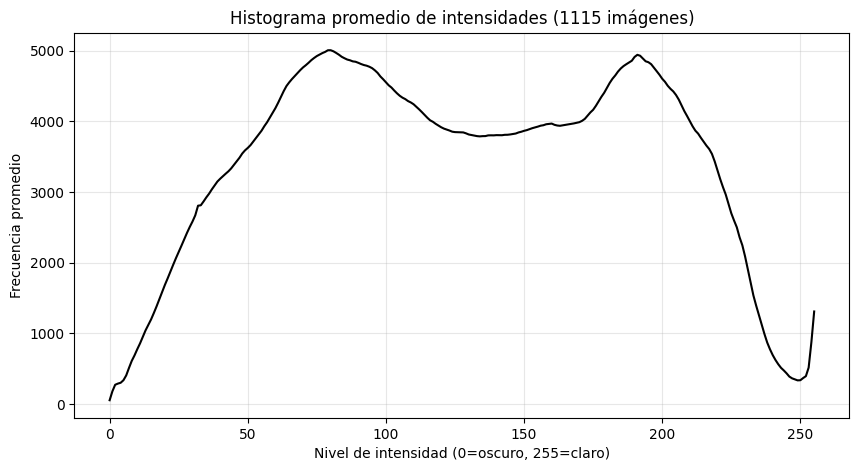

In [26]:
#Histograma promedio de todas las imágenes
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("images_dataset_base.csv")
all_images = df["path"].tolist()

hist_sum = np.zeros((256,), dtype=np.float64)
count = 0

for img_path in all_images:
    img = cv2.imread(img_path)
    if img is None:
        print(f"No se pudo leer: {img_path}")
        continue

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    hist = cv2.calcHist([gray], [0], None, [256], [0, 256]).flatten()

    hist_sum += hist
    count += 1

# Promedio global del histograma
hist_promedio = hist_sum / count

plt.figure(figsize=(10, 5))
plt.plot(hist_promedio, color='black')
plt.title("Histograma promedio de intensidades (1115 imágenes)")
plt.xlabel("Nivel de intensidad (0=oscuro, 255=claro)")
plt.ylabel("Frecuencia promedio")
plt.grid(alpha=0.3)
plt.show()

In [27]:
#Clasificación de imágenes según predominancia del brillo
import cv2
import numpy as np
import pandas as pd

df = pd.read_csv("images_dataset_base.csv")
all_images = df["path"].tolist()

clasificacion = {"oscuras": 0, "claras": 0, "equilibradas": 0}

for img_path in all_images:
    img = cv2.imread(img_path)
    if img is None:
        continue

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    hist = cv2.calcHist([gray], [0], None, [256], [0, 256]).flatten()
    hist_norm = hist / hist.sum()

    oscuras = hist_norm[:85].sum()   # zona de intensidades bajas
    claras = hist_norm[170:].sum()   # zona de intensidades altas

    if oscuras > claras + 0.1:
        clasificacion["oscuras"] += 1
    elif claras > oscuras + 0.1:
        clasificacion["claras"] += 1
    else:
        clasificacion["equilibradas"] += 1

total = sum(clasificacion.values())
for k, v in clasificacion.items():
    porcentaje = (v / total) * 100
    print(f"{k.capitalize()}: {v} imágenes ({porcentaje:.2f}%)")

Oscuras: 365 imágenes (32.74%)
Claras: 448 imágenes (40.18%)
Equilibradas: 302 imágenes (27.09%)
